# Bike Sharing Insights
## How Ride Count and Duration are Affected by Time and User data
### by Islam Mohamed

## Investigation Overview

In this investigation, I'm most interested in figuring out what features are best for predicting the number of trips taken, and the trip duration through exploring the following features of the dataset; the trip time (summarized by weekday, and hour), and the user demographic data (summarized by service subsription type, birth year, and gender)

## Dataset Overview

This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. There are 183,412 individual rides data in the dataset. 8460 data points were removed from the dataset due to missing data. The dataset includes 16 features, that can be summarized as following;
- Time; Trip Duration in seconds, Start Time, End Time
- Departure and Destination; Start Station, End Station (ID, Name, Coordinates)
- Bike; ID
- User; Type, Birth Year, Gender

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# loading csv file into pandas dataframe
bikeshare_df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# dropping unwanted data
# dropping rows with NaN values and saving changes into a new dataframe
bikeshare_clean = bikeshare_df.dropna(subset=['start_station_id', 'member_gender'], axis=0)
bikeshare_clean.reset_index(drop=True, inplace=True)
# dropping unwanted columns across the column (1) axis, in place
bikeshare_clean.drop(labels=['start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_name',
                             'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip'], axis=1, inplace=True)

In [4]:
# Adjusting data types
# setting start_time and end_time to datetime datatype for easier operations
bikeshare_clean.loc[:, 'start_time'] =  pd.to_datetime(bikeshare_clean.loc[:, 'start_time'])
bikeshare_clean.loc[:, 'end_time'] =  pd.to_datetime(bikeshare_clean.loc[:, 'end_time'])
# convert dtypes to appropriate types
bikeshare_clean = bikeshare_clean.astype({'start_station_id':'int64', 'end_station_id':'int64', 'member_birth_year':'int64'})
# converting user_type, member_gender into categorical types
user_cat = bikeshare_clean['user_type'].value_counts()
gender_cat = bikeshare_clean['member_gender'].value_counts()
bikeshare_clean['user_type'] = bikeshare_clean['user_type'].astype(pd.api.types.CategoricalDtype(categories=user_cat.index))
bikeshare_clean['member_gender'] = bikeshare_clean['member_gender'].astype(pd.api.types.CategoricalDtype(categories=gender_cat.index))

In [5]:
# adding columns using datetime methods
bikeshare_clean['weekday']= bikeshare_clean['start_time'].dt.day_name()
bikeshare_clean['hour']= bikeshare_clean['start_time'].dt.hour
# converting weekday into ordered categorical type
weekday_cat = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bikeshare_clean['weekday'] = bikeshare_clean['weekday'].astype(pd.api.types.CategoricalDtype(ordered=True,
                                                                                             categories=weekday_cat))

## Distribution of Trip Duration
#### Average bike ride duration is less than 10 mins
Trip durations in the dataset take on a very large range of values, from about 1 minute at the lowest to about 1 day at the highest. The initial plot suggested some strong outliers on the right. Plotted on a logarithmic scale, the duration distribution is normal, with most trips having duration around 500 seconds.

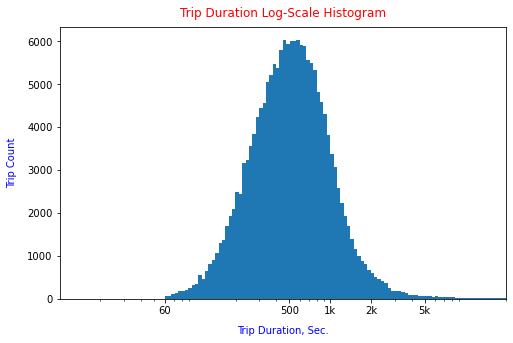

In [6]:
# Univarite plot of the trip duration distribution
log_binsize = 0.025
bins = 10 ** np.arange(.05, np.log10(bikeshare_clean['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikeshare_clean, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([60, 500, 1e3, 2e3, 5e3, 10e4], [60, 500, '1k', '2k', '5k', '10k'])
plt.xlim(10, 20000);
plt.xlabel('Trip Duration, Sec.', labelpad=10, color='blue')
plt.ylabel('Trip Count', labelpad=10, color='Blue')
plt.title('Trip Duration Log-Scale Histogram', fontdict={'color': 'red'}, pad=10);
plt.show();

## Distribution of Trip Start Date
### Most rides are taken during weekdays
Trip Date distributions show that lower trip count was observed on weekends and higher trip counts were happening during weekdays with Thursday being the highest. Weekend engagement is almost 50% of that of an average weekday.

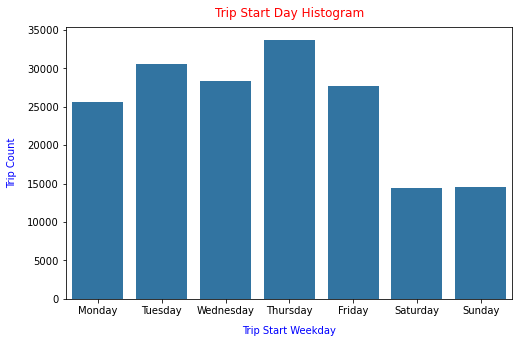

In [7]:
# plotting by weekday
plt.figure(figsize=[8, 5])
sb.countplot(data = bikeshare_clean, x = 'weekday', color = sb.color_palette()[0])
plt.xlabel('Trip Start Weekday', labelpad=10, color='blue')
plt.ylabel('Trip Count', labelpad=10, color='Blue')
plt.title('Trip Start Day Histogram', fontdict={'color': 'red'}, pad=10);
plt.show();

## Distribution of Trip Start Date
### Bike-sharing also has rush hours
On another hand, the distribution of trips along the day is bimodal with one peak at **8:00 AM** and another at **05:00 PM**, and the lowest number of trips were taken after midnight

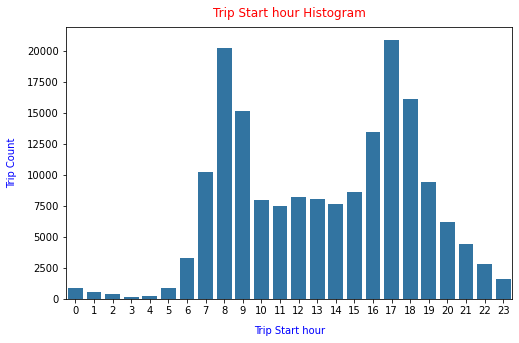

In [8]:
# plotting by hour
plt.figure(figsize=[8, 5])
sb.countplot(data = bikeshare_clean, x = 'hour', color = sb.color_palette()[0])
plt.xlabel('Trip Start hour', labelpad=10, color='blue')
plt.ylabel('Trip Count', labelpad=10, color='Blue')
plt.title('Trip Start hour Histogram', fontdict={'color': 'red'}, pad=10);
plt.show();

## Duration VS. Trip Date

An interesting observation is made here is that the average trip duration actually increases on weekends and at late hours after midnight. These are the same times that were previously observed to have the lowest number of rides.

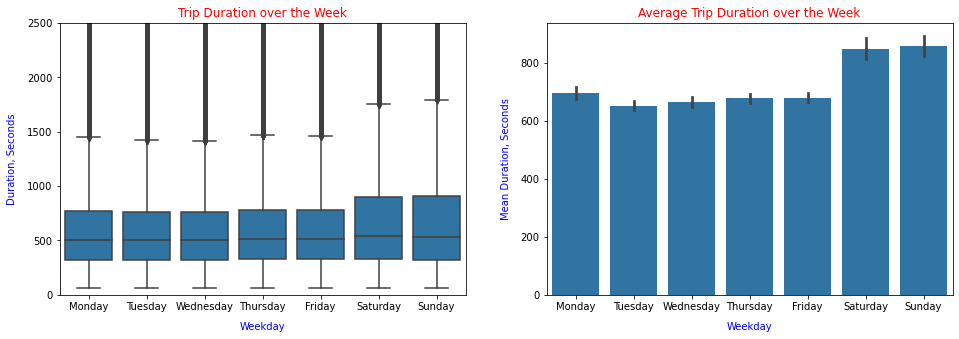

In [9]:
# bivariate plot of duration, mean duration vs. weekday
fig, ax = plt.subplots(ncols=2, figsize = [16,5])

sb.boxplot(data=bikeshare_clean, x='weekday', y='duration_sec', color=sb.color_palette()[0], ax=ax[0])
ax[0].set_ylim(0, 2500);
ax[0].set_xlabel('Weekday', labelpad=10, color='Blue')
ax[0].set_ylabel('Duration, Seconds', labelpad=10, color='Blue')
ax[0].set_title('Trip Duration over the Week', color='red');

sb.barplot(data=bikeshare_clean, x='weekday', y='duration_sec', color=sb.color_palette()[0], ax=ax[1])
ax[1].set_xlabel('Weekday', labelpad=10, color='Blue')
ax[1].set_ylabel('Mean Duration, Seconds', labelpad=10, color='Blue')
ax[1].set_title('Average Trip Duration over the Week', color='red');

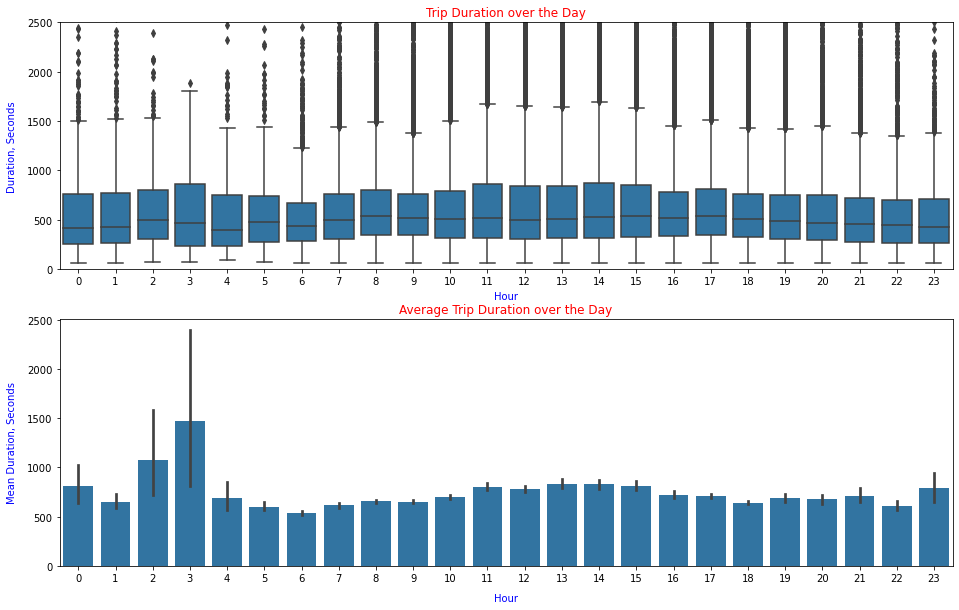

In [10]:
# bivariate plot of duration, mean duration vs. hour
fig, ax = plt.subplots(nrows=2, figsize = [16,10])

sb.boxplot(data=bikeshare_clean, x='hour', y='duration_sec', color=sb.color_palette()[0], ax=ax[0])
ax[0].set_ylim(0, 2500);
ax[0].set_xlabel('Hour', labelpad=5, color='Blue')
ax[0].set_ylabel('Duration, Seconds', labelpad=10, color='Blue')
ax[0].set_title('Trip Duration over the Day', color='red');

sb.barplot(data=bikeshare_clean, x='hour', y='duration_sec', color=sb.color_palette()[0], ax=ax[1])
ax[1].set_xlabel('Hour', labelpad=10, color='Blue')
ax[1].set_ylabel('Mean Duration, Seconds', labelpad=10, color='Blue')
ax[1].set_title('Average Trip Duration over the Day', color='red');

## Duration by Different User Data
### Bike riders are mostly young males, but strong rides aren't
There are some effects visible between the user and the average trip duration and trip counts. The mean ride duration is higher for females than males. Also unsubscribed customers tend to take longer rides than subscribers. Also There is a huge drop in subscribers rides in the weekend

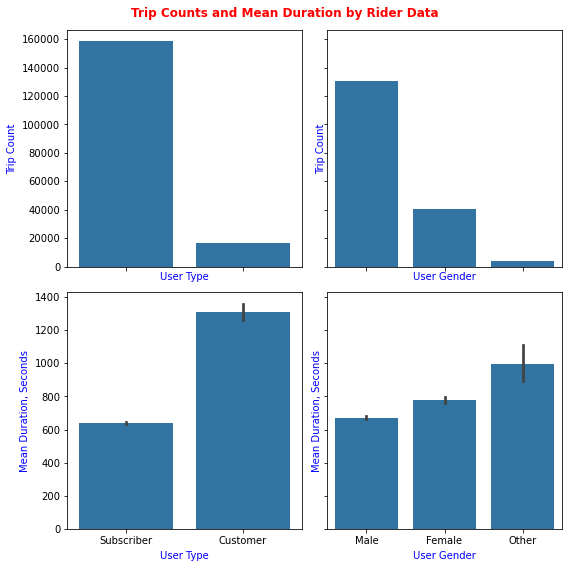

In [11]:
# plots of duration, mean duration vs. user_type, member_gender
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = [8,8], sharey='row', sharex='col')

sb.countplot(data=bikeshare_clean, x='user_type', color=sb.color_palette()[0], ax=ax[0,0])
sb.countplot(data=bikeshare_clean, x='member_gender', color=sb.color_palette()[0], ax=ax[0,1])
sb.barplot(data=bikeshare_clean, x='user_type', y='duration_sec', color=sb.color_palette()[0], ax=ax[1,0])
sb.barplot(data=bikeshare_clean, x='member_gender', y='duration_sec', color=sb.color_palette()[0], ax=ax[1,1])

ax[0,0].set_xlabel('User Type', labelpad=5, color='Blue')
ax[0,0].set_ylabel('Trip Count', labelpad=5, color='Blue')
ax[0,1].set_xlabel('User Gender', labelpad=5, color='Blue');
ax[0,1].set_ylabel('Trip Count', labelpad=1, color='Blue')
ax[1,0].set_xlabel('User Type', labelpad=5, color='Blue')
ax[1,0].set_ylabel('Mean Duration, Seconds', labelpad=5, color='Blue')
ax[1,1].set_xlabel('User Gender', labelpad=5, color='Blue');
ax[1,1].set_ylabel('Mean Duration, Seconds', labelpad=5, color='Blue')

fig.suptitle('Trip Counts and Mean Duration by Rider Data', color='red', fontweight ="bold")
fig.tight_layout()

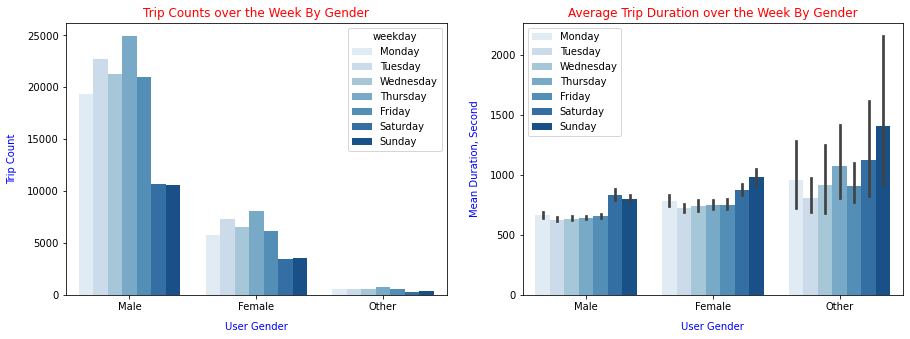

In [12]:
# plotting for User Gender
plt.figure(figsize=[15, 5]);

plt.subplot(1,2,1)
sb.countplot(data = bikeshare_clean, x='member_gender', hue='weekday', palette='Blues');
plt.xlabel('User Gender', labelpad=10, color='Blue')
plt.ylabel('Trip Count', labelpad=10, color='Blue')
plt.title('Trip Counts over the Week By Gender', color='red');

plt.subplot(1,2,2)
sb.barplot(data = bikeshare_clean, x='member_gender', y='duration_sec', hue='weekday', palette='Blues');
plt.xlabel('User Gender', labelpad=10, color='Blue')
plt.ylabel('Mean Duration, Second', labelpad=10, color='Blue')
plt.title('Average Trip Duration over the Week By Gender', color='red');
plt.legend();